In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [41]:
df=pd.read_csv('./uber_data.csv')

In [42]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2016-03-01 00:00:00,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,2016-03-01 00:00:00,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2016-03-01 00:00:00,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,2,2016-03-01 00:00:00,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,2,2016-03-01 00:00:00,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80


In [43]:
df.shape

(100000, 19)

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               100000 non-null  int64  
 1   tpep_pickup_datetime   100000 non-null  object 
 2   tpep_dropoff_datetime  100000 non-null  object 
 3   passenger_count        100000 non-null  int64  
 4   trip_distance          100000 non-null  float64
 5   pickup_longitude       100000 non-null  float64
 6   pickup_latitude        100000 non-null  float64
 7   RatecodeID             100000 non-null  int64  
 8   store_and_fwd_flag     100000 non-null  object 
 9   dropoff_longitude      100000 non-null  float64
 10  dropoff_latitude       100000 non-null  float64
 11  payment_type           100000 non-null  int64  
 12  fare_amount            100000 non-null  float64
 13  extra                  100000 non-null  float64
 14  mta_tax                100000 non-nul

### converting datetime datatype from object to a proper datetime format

In [45]:
df['tpep_pickup_datetime']=pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime']=pd.to_datetime(df['tpep_dropoff_datetime'])

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               100000 non-null  int64         
 1   tpep_pickup_datetime   100000 non-null  datetime64[ns]
 2   tpep_dropoff_datetime  100000 non-null  datetime64[ns]
 3   passenger_count        100000 non-null  int64         
 4   trip_distance          100000 non-null  float64       
 5   pickup_longitude       100000 non-null  float64       
 6   pickup_latitude        100000 non-null  float64       
 7   RatecodeID             100000 non-null  int64         
 8   store_and_fwd_flag     100000 non-null  object        
 9   dropoff_longitude      100000 non-null  float64       
 10  dropoff_latitude       100000 non-null  float64       
 11  payment_type           100000 non-null  int64         
 12  fare_amount            100000 non-null  float

In [47]:
df.drop_duplicates().reset_index(drop=True)
df['trip_id']=df.index

In [48]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


### Transforming the dataset

In [49]:
datetime_dim=df[['tpep_pickup_datetime', 'tpep_dropoff_datetime']].reset_index(drop=True)
datetime_dim['tpep_pickup_datetime']=datetime_dim['tpep_pickup_datetime']
datetime_dim['pick_hour']=datetime_dim['tpep_pickup_datetime'].dt.hour
datetime_dim['pick_day']=datetime_dim['tpep_pickup_datetime'].dt.day
datetime_dim['pick_month']=datetime_dim['tpep_pickup_datetime'].dt.month
datetime_dim['pick_year']=datetime_dim['tpep_pickup_datetime'].dt.year
datetime_dim['pick_weekday']=datetime_dim['tpep_pickup_datetime'].dt.weekday

datetime_dim['tpep_dropoff_datetime']=datetime_dim['tpep_dropoff_datetime']
datetime_dim['drop_hour']=datetime_dim['tpep_dropoff_datetime'].dt.hour
datetime_dim['drop_day']=datetime_dim['tpep_dropoff_datetime'].dt.day
datetime_dim['drop_month']=datetime_dim['tpep_dropoff_datetime'].dt.month
datetime_dim['drop_year']=datetime_dim['tpep_dropoff_datetime'].dt.year
datetime_dim['drop_weekday']=datetime_dim['tpep_dropoff_datetime'].dt.weekday

datetime_dim['datetime_id']=datetime_dim.index

datetime_dim=datetime_dim[['datetime_id', 'tpep_pickup_datetime', 'pick_hour', 'pick_day', 'pick_month', 'pick_year', 'pick_weekday', 'tpep_dropoff_datetime', 'drop_hour', 'drop_day', 'drop_month', 'drop_year', 'drop_weekday']]

datetime_dim.head()

,datetime_id,tpep_pickup_datetime,pick_hour,pick_day,pick_month,pick_year,pick_weekday,tpep_dropoff_datetime,drop_hour,drop_day,drop_month,drop_year,drop_weekday
0,0,2016-03-01,0,1,3,2016,1,2016-03-01 00:07:55,0,1,3,2016,1
1,1,2016-03-01,0,1,3,2016,1,2016-03-01 00:11:06,0,1,3,2016,1
2,2,2016-03-01,0,1,3,2016,1,2016-03-01 00:31:06,0,1,3,2016,1
3,3,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1
4,4,2016-03-01,0,1,3,2016,1,2016-03-01 00:00:00,0,1,3,2016,1


In [50]:
passenger_count_dim=df[['passenger_count']].reset_index(drop=True)
passenger_count_dim['passenger_count_id']=passenger_count_dim.index
passenger_count_dim=passenger_count_dim[['passenger_count_id', 'passenger_count']]

trip_distance_dim = df[['trip_distance']].reset_index(drop=True)
trip_distance_dim['trip_distance_id'] = trip_distance_dim.index
trip_distance_dim = trip_distance_dim[['trip_distance_id','trip_distance']]

In [51]:
passenger_count_dim.head()

,passenger_count_id,passenger_count
0,0,1
1,1,1
2,2,2
3,3,3
4,4,5


In [52]:
trip_distance_dim.head()

,trip_distance_id,trip_distance
0,0,2.50
1,1,2.90
2,2,19.98
3,3,10.78
4,4,30.43


In [53]:
rate_code_type = {
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"
}

rate_code_dim=df[['RatecodeID']].reset_index(drop=True)
rate_code_dim['rate_code_id']=rate_code_dim.index
rate_code_dim['rate_code_name']=rate_code_dim['RatecodeID'].map(rate_code_type)
rate_code_dim = rate_code_dim[['rate_code_id','RatecodeID','rate_code_name']]

In [54]:
rate_code_dim.head()

,rate_code_id,RatecodeID,rate_code_name
0,0,1,Standard rate
1,1,1,Standard rate
2,2,1,Standard rate
3,3,1,Standard rate
4,4,3,Newark


In [55]:
pickup_location_dim = df[['pickup_longitude', 'pickup_latitude']].reset_index(drop=True)
pickup_location_dim['pickup_location_id'] = pickup_location_dim.index
pickup_location_dim = pickup_location_dim[['pickup_location_id','pickup_latitude','pickup_longitude']] 


dropoff_location_dim = df[['dropoff_longitude', 'dropoff_latitude']].reset_index(drop=True)
dropoff_location_dim['dropoff_location_id'] = dropoff_location_dim.index
dropoff_location_dim = dropoff_location_dim[['dropoff_location_id','dropoff_latitude','dropoff_longitude']]

In [56]:
pickup_location_dim.head()

,pickup_location_id,pickup_latitude,pickup_longitude
0,0,40.765152,-73.976746
1,1,40.767925,-73.983482
2,2,40.644810,-73.782021
3,3,40.769814,-73.863419
4,4,40.792183,-73.971741


In [57]:
dropoff_location_dim.head()

,dropoff_location_id,dropoff_latitude,dropoff_longitude
0,0,40.746128,-74.004265
1,1,40.733166,-74.005943
2,2,40.675770,-73.974541
3,3,40.757767,-73.969650
4,4,40.695053,-74.177170


In [58]:
payment_type_name = {
    1:"Credit card",
    2:"Cash",
    3:"No charge",
    4:"Dispute",
    5:"Unknown",
    6:"Voided trip"
}
payment_type_dim = df[['payment_type']].reset_index(drop=True)
payment_type_dim['payment_type_id'] = payment_type_dim.index
payment_type_dim['payment_type_name'] = payment_type_dim['payment_type'].map(payment_type_name)
payment_type_dim = payment_type_dim[['payment_type_id','payment_type','payment_type_name']]

In [59]:
fact_table = df.merge(passenger_count_dim, left_on='trip_id', right_on='passenger_count_id') \
             .merge(trip_distance_dim, left_on='trip_id', right_on='trip_distance_id') \
             .merge(rate_code_dim, left_on='trip_id', right_on='rate_code_id') \
             .merge(pickup_location_dim, left_on='trip_id', right_on='pickup_location_id') \
             .merge(dropoff_location_dim, left_on='trip_id', right_on='dropoff_location_id')\
             .merge(datetime_dim, left_on='trip_id', right_on='datetime_id') \
             .merge(payment_type_dim, left_on='trip_id', right_on='payment_type_id') \
             [['trip_id','VendorID', 'datetime_id', 'passenger_count_id',
               'trip_distance_id', 'rate_code_id', 'store_and_fwd_flag', 'pickup_location_id', 'dropoff_location_id',
               'payment_type_id', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount',
               'improvement_surcharge', 'total_amount']]

In [60]:
fact_table.head()

,trip_id,VendorID,datetime_id,passenger_count_id,trip_distance_id,rate_code_id,store_and_fwd_flag,pickup_location_id,dropoff_location_id,payment_type_id,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,0,1,0,0,0,0,N,0,0,0,9.0,0.5,0.5,2.05,0.00,0.3,12.35
1,1,1,1,1,1,1,N,1,1,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35
2,2,2,2,2,2,2,N,2,2,2,54.5,0.5,0.5,8.00,0.00,0.3,63.80
3,3,2,3,3,3,3,N,3,3,3,31.5,0.0,0.5,3.78,5.54,0.3,41.62
4,4,2,4,4,4,4,N,4,4,4,98.0,0.0,0.0,0.00,15.50,0.3,113.80


### Let's play with the dataframe

In [61]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,40.746128,1,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,40.733166,1,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,40.675770,1,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,40.757767,1,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,40.695053,1,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4


### Year: 2016; Day: 1/10; Month: 03

In [67]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id,pickup_hour,pickup_minute
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0,0,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1,0,0
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2,0,0
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3,0,0
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4,0,0


In [64]:
df['pickup_hour']=df['tpep_pickup_datetime'].dt.hour

In [65]:
df['pickup_minute']=df['tpep_pickup_datetime'].dt.minute

In [68]:
df.sample(10)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id,pickup_hour,pickup_minute
98933,2,2016-03-10 14:23:08,2016-03-10 14:29:06,6,1.62,-73.975067,40.792686,1,N,-73.963959,...,7.5,0.0,0.5,1.66,0.00,0.3,9.96,98933,14,23
31746,2,2016-03-10 09:57:37,2016-03-10 10:05:52,1,0.95,-73.995041,40.739651,1,N,-73.986511,...,7.0,0.0,0.5,1.56,0.00,0.3,9.36,31746,9,57
30473,2,2016-03-10 09:50:04,2016-03-10 10:12:57,6,7.86,-73.994141,40.751228,1,N,-73.942886,...,26.5,0.0,0.5,0.00,0.00,0.3,27.30,30473,9,50
37582,2,2016-03-10 10:33:37,2016-03-10 10:46:43,1,1.61,-74.004379,40.742340,1,N,-73.986359,...,9.5,0.0,0.5,2.00,0.00,0.3,12.30,37582,10,33
95336,2,2016-03-10 14:03:22,2016-03-10 14:10:22,6,1.35,-74.009064,40.717991,1,N,-73.998184,...,7.0,0.0,0.5,1.56,0.00,0.3,9.36,95336,14,3
29232,2,2016-03-10 09:43:04,2016-03-10 10:10:52,5,6.51,-73.985336,40.768471,1,N,-74.004272,...,24.0,0.0,0.5,4.96,0.00,0.3,29.76,29232,9,43
79169,1,2016-03-01 01:11:49,2016-03-01 01:13:20,1,0.40,-73.979988,40.761513,1,N,-73.976028,...,3.5,0.5,0.5,1.20,0.00,0.3,6.00,79169,1,11
11234,2,2016-03-10 08:07:47,2016-03-10 08:25:03,1,5.17,-74.007408,40.703667,1,N,-73.973145,...,18.0,0.0,0.5,4.70,0.00,0.3,23.50,11234,8,7
48427,2,2016-03-10 11:42:24,2016-03-10 11:49:56,1,0.41,-73.990959,40.760651,1,N,-73.995750,...,6.0,0.0,0.5,0.00,0.00,0.3,6.80,48427,11,42
46520,2,2016-03-10 11:31:19,2016-03-10 12:12:22,1,16.23,-73.790741,40.646469,2,N,-73.976830,...,52.0,0.0,0.5,14.58,5.54,0.3,72.92,46520,11,31


In [86]:
pickup_hour_analysis=df.groupby(['pickup_hour'], as_index=False)['VendorID'].count().sort_values(by='pickup_hour')
pickup_hour_analysis

,pickup_hour,VendorID
0,0,7079
1,1,4148
2,2,2602
3,3,1860
4,4,1929
5,5,3697
6,6,1905
7,7,9550
8,8,11708
9,9,10710


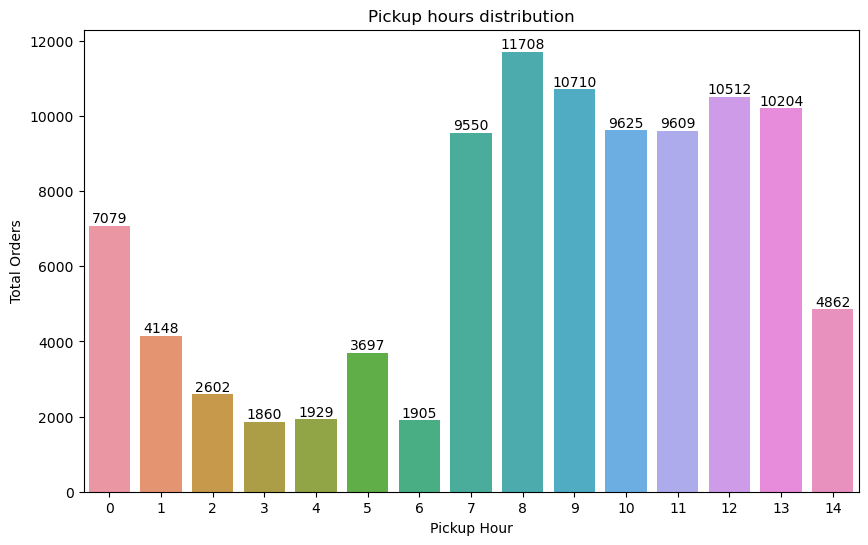

In [89]:
plt.figure(figsize=(10, 6))
ax=sns.barplot(x='pickup_hour', y='VendorID', data=pickup_hour_analysis)
for bars in ax.containers:
    ax.bar_label(bars)
plt.title("Pickup hours distribution")
plt.xlabel("Pickup Hour")
plt.ylabel("Total Orders")
plt.show()

In [91]:
df['RatecodeID'].value_counts()

1    97199
2     2207
5      283
3      262
4       48
6        1
Name: RatecodeID, dtype: int64

### Rate Code Id: 
    1:"Standard rate",
    2:"JFK",
    3:"Newark",
    4:"Nassau or Westchester",
    5:"Negotiated fare",
    6:"Group ride"

In [93]:
rate_code_count=df.groupby(['RatecodeID'], as_index=False)['VendorID'].count().sort_values(by='VendorID', ascending=False)
rate_code_count

,RatecodeID,VendorID
0,1,97199
1,2,2207
4,5,283
2,3,262
3,4,48
5,6,1


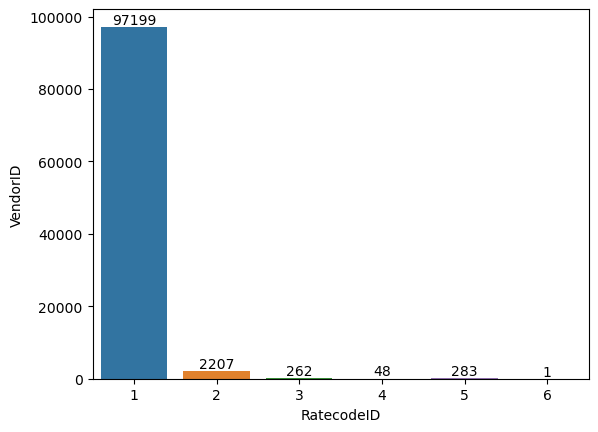

In [95]:
ax=sns.barplot(x='RatecodeID', y='VendorID', data=rate_code_count)
for bars in ax.containers:
    ax.bar_label(bars)
plt.show()

In [96]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,pickup_longitude,pickup_latitude,RatecodeID,store_and_fwd_flag,dropoff_longitude,...,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,trip_id,pickup_hour,pickup_minute
0,1,2016-03-01,2016-03-01 00:07:55,1,2.50,-73.976746,40.765152,1,N,-74.004265,...,9.0,0.5,0.5,2.05,0.00,0.3,12.35,0,0,0
1,1,2016-03-01,2016-03-01 00:11:06,1,2.90,-73.983482,40.767925,1,N,-74.005943,...,11.0,0.5,0.5,3.05,0.00,0.3,15.35,1,0,0
2,2,2016-03-01,2016-03-01 00:31:06,2,19.98,-73.782021,40.644810,1,N,-73.974541,...,54.5,0.5,0.5,8.00,0.00,0.3,63.80,2,0,0
3,2,2016-03-01,2016-03-01 00:00:00,3,10.78,-73.863419,40.769814,1,N,-73.969650,...,31.5,0.0,0.5,3.78,5.54,0.3,41.62,3,0,0
4,2,2016-03-01,2016-03-01 00:00:00,5,30.43,-73.971741,40.792183,3,N,-74.177170,...,98.0,0.0,0.0,0.00,15.50,0.3,113.80,4,0,0


In [97]:
df['passenger_count'].value_counts()

1    65493
2    13709
5     8748
6     6077
3     4076
4     1894
0        3
Name: passenger_count, dtype: int64

In [103]:
print("Maximum tip:", df['tip_amount'].max())
print("Minimum tip:", df['tip_amount'].min())

Maximum tip: 125.88
Minimum tip: -2.7


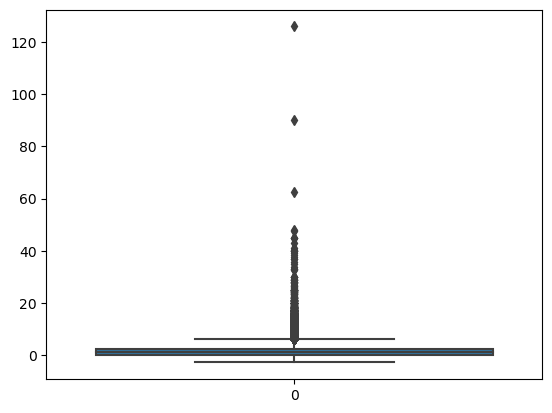

In [108]:
sns.boxplot(df['tip_amount'])
plt.show()

In [109]:
Q1=df['tip_amount'].quantile(0.25)
Q3=df['tip_amount'].quantile(0.75)
IQR=Q3-Q1
print("Q1:", Q1)
print("Q3:", Q3)
print("IQR", IQR)

Q1: 0.0
Q3: 2.46
IQR 2.46


In [111]:
lower_range=Q1-1.5*IQR
upper_range=Q3+1.5*IQR
print("Upper range:", upper_range)
print("Lower range:", lower_range)

Upper range: 6.15
Lower range: -3.69


### Dealing with outliers using the capping method

In [112]:
df['tip_amount']=df['tip_amount'].apply(lambda x: lower_range if x<lower_range else (upper_range if x>upper_range else x))

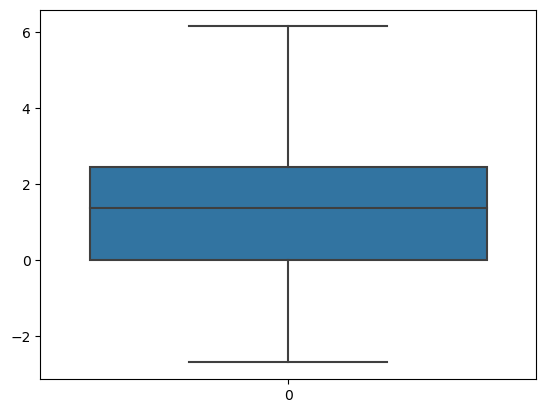

In [113]:
sns.boxplot(df['tip_amount'])
plt.show()